In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Multiple%20linear%20regression/50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df1=df.rename({'R&D Spend':'rnd','Administration':'admin','Marketing Spend':'mspend','State':'state'},axis=1)

In [6]:
df1

,rnd,admin,mspend,state,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
df1.shape

(50, 5)

Text(0.5, 1.0, 'PROFIT')

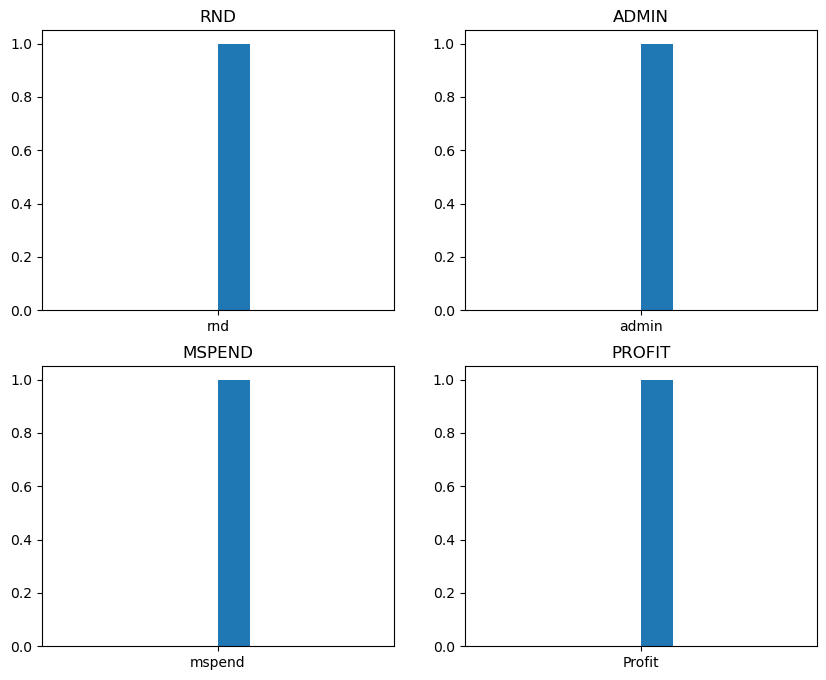

In [14]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.hist('rnd')
plt.title('RND')
plt.subplot(2,2,2)
plt.hist('admin')
plt.title('ADMIN')
plt.subplot(2,2,3)
plt.hist('mspend')
plt.title('MSPEND')
plt.subplot(2,2,4)
plt.hist('Profit')
plt.title('PROFIT')

In [15]:
model = smf.ols('Profit~rnd+admin+mspend', data=df1).fit()

In [16]:
model.params

Intercept    50122.192990
rnd              0.805715
admin           -0.026816
mspend           0.027228
dtype: float64

In [17]:
print(model.tvalues,'\n',model.pvalues)

Intercept     7.626218
rnd          17.846374
admin        -0.525507
mspend        1.655077
dtype: float64 
 Intercept    1.057379e-09
rnd          2.634968e-22
admin        6.017551e-01
mspend       1.047168e-01
dtype: float64


In [18]:
(model.rsquared,model.rsquared_adj)


(0.9507459940683246, 0.9475337762901719)

In [19]:
ml_r=smf.ols('Profit~rnd',data = df1).fit()  


In [20]:
print(ml_r.tvalues,'\n',ml_r.pvalues)
(ml_r.rsquared,ml_r.rsquared_adj)

Intercept    19.320288
rnd          29.151139
dtype: float64 
 Intercept    2.782697e-24
rnd          3.500322e-32
dtype: float64


(0.9465353160804393, 0.9454214684987817)

In [21]:
ml_admin=smf.ols('Profit~admin',data = df1).fit()  


In [22]:
print(ml_admin.tvalues,'\n',ml_admin.pvalues)
(ml_admin.rsquared,ml_admin.rsquared_adj)

Intercept    3.040044
admin        1.419493
dtype: float64 
 Intercept    0.003824
admin        0.162217
dtype: float64


(0.04028714077757223, 0.020293122877105052)

In [23]:
ml_mspend=smf.ols('Profit~mspend',data=df1).fit()

In [24]:
print(ml_mspend.tvalues,'\n',ml_mspend.pvalues)
(ml_mspend.rsquared,ml_mspend.rsquared_adj)

Intercept    7.808356
mspend       7.802657
dtype: float64 
 Intercept    4.294735e-10
mspend       4.381073e-10
dtype: float64


(0.5591535746115515, 0.5499692740826254)

In [25]:
ml_ra=smf.ols('Profit~rnd+admin',data = df1).fit()
print(ml_ra.tvalues,'\n',ml_ra.pvalues)
(ml_ra.rsquared,ml_ra.rsquared_adj)


Intercept     9.122352
rnd          28.588870
admin        -1.072677
dtype: float64 
 Intercept    5.695336e-12
rnd          2.278348e-31
admin        2.888932e-01
dtype: float64


(0.9478129385009173, 0.9455922124796797)

In [26]:
ml_rm=smf.ols('Profit~rnd+mspend',data = df1).fit()
print(ml_rm.tvalues,'\n',ml_rm.pvalues)
(ml_rm.rsquared,ml_rm.rsquared_adj)


Intercept    17.463582
rnd          19.265555
mspend        1.927052
dtype: float64 
 Intercept    3.504062e-22
rnd          6.040433e-24
mspend       6.003040e-02
dtype: float64


(0.9504503015559763, 0.9483418037498477)

In [27]:
ml_am=smf.ols('Profit~admin+mspend',data = df1).fit()
print(ml_am.tvalues,'\n',ml_am.pvalues)
(ml_am.rsquared,ml_am.rsquared_adj)

Intercept    1.142741
admin        2.467779
mspend       8.281039
dtype: float64 
 Intercept    2.589341e-01
admin        1.729198e-02
mspend       9.727245e-11
dtype: float64


(0.6097229746770662, 0.5931154416846008)

In [28]:
df1.corr()

,rnd,admin,mspend,Profit
rnd,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
mspend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [30]:
rsq_rnd = smf.ols('rnd~admin+mspend',data=df1).fit().rsquared
vif_rnd = 1/(1-rsq_rnd)

rsq_admin = smf.ols('admin~rnd+mspend',data=df1).fit().rsquared  
vif_admin = 1/(1-rsq_admin) 

rsq_mspend = smf.ols('mspend~rnd+admin',data=df1).fit().rsquared  
vif_mspend = 1/(1-rsq_mspend) 

d1 = {'Variables':['rnd','admin','mspend'],'VIF':[vif_rnd,vif_admin,vif_mspend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,rnd,2.468903
1,admin,1.175091
2,mspend,2.326773


In [31]:
model = smf.ols('Profit~rnd+admin',data=df1).fit()
f'AIC:{model.aic}, rsq_wt:{rsq_rnd}'


'AIC:1059.6636934567293, rsq_wt:0.5949618224573935'

In [32]:
model = smf.ols('Profit~admin+mspend',data=df1).fit()
f'AIC:{model.aic}, rsq_wt:{rsq_mspend}'

'AIC:1160.2648038638672, rsq_wt:0.5702202685282503'

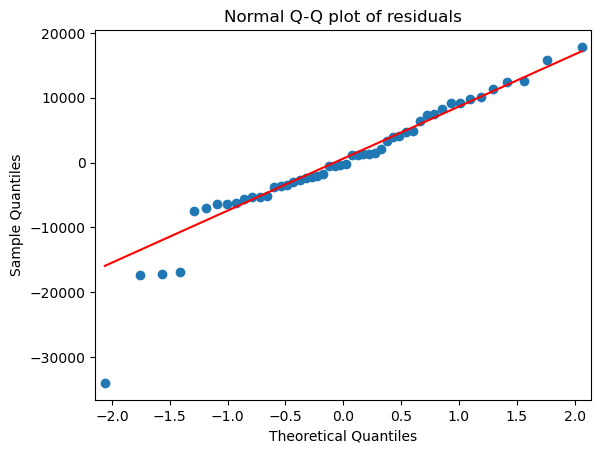

In [33]:
import statsmodels.api as sm

model = smf.ols('Profit~rnd+admin',data=df1).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [34]:
model = smf.ols('Profit~rnd+admin+mspend',data=df1).fit()


In [35]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

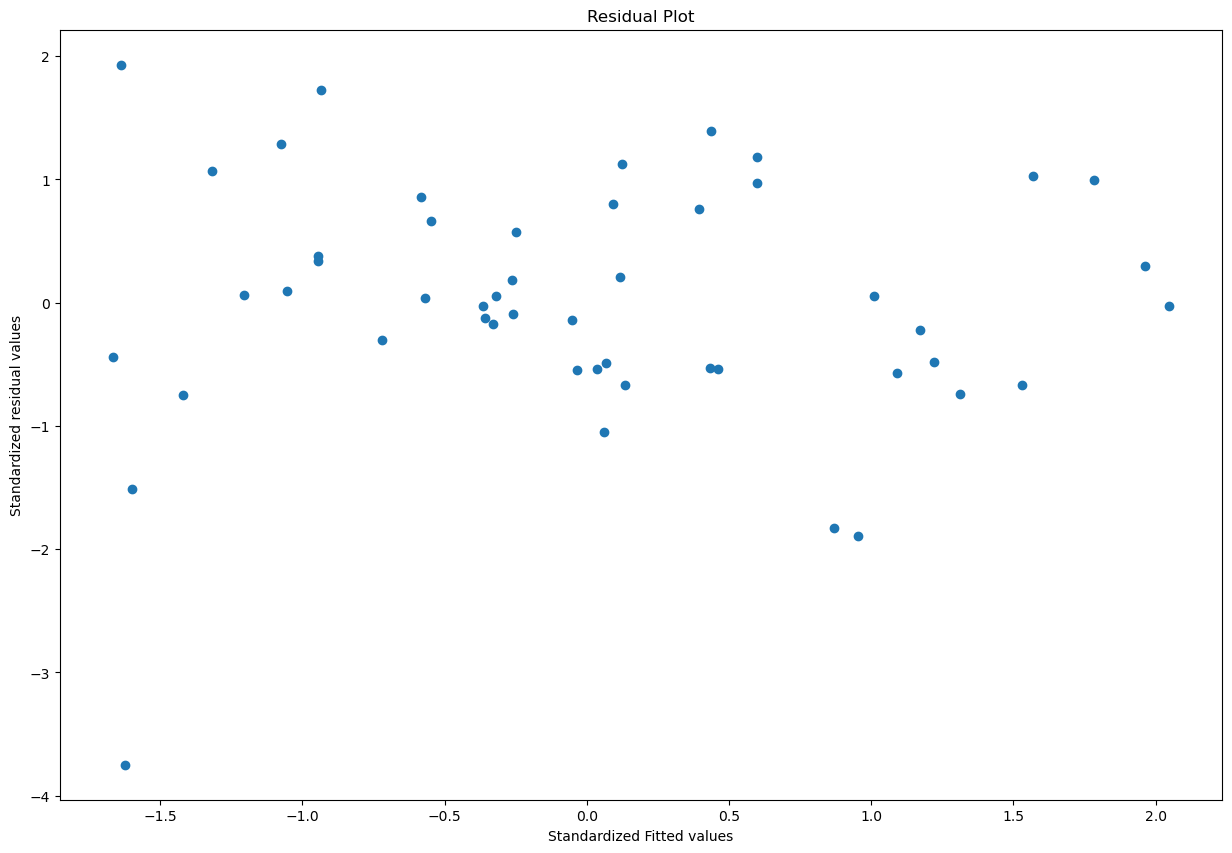

In [36]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


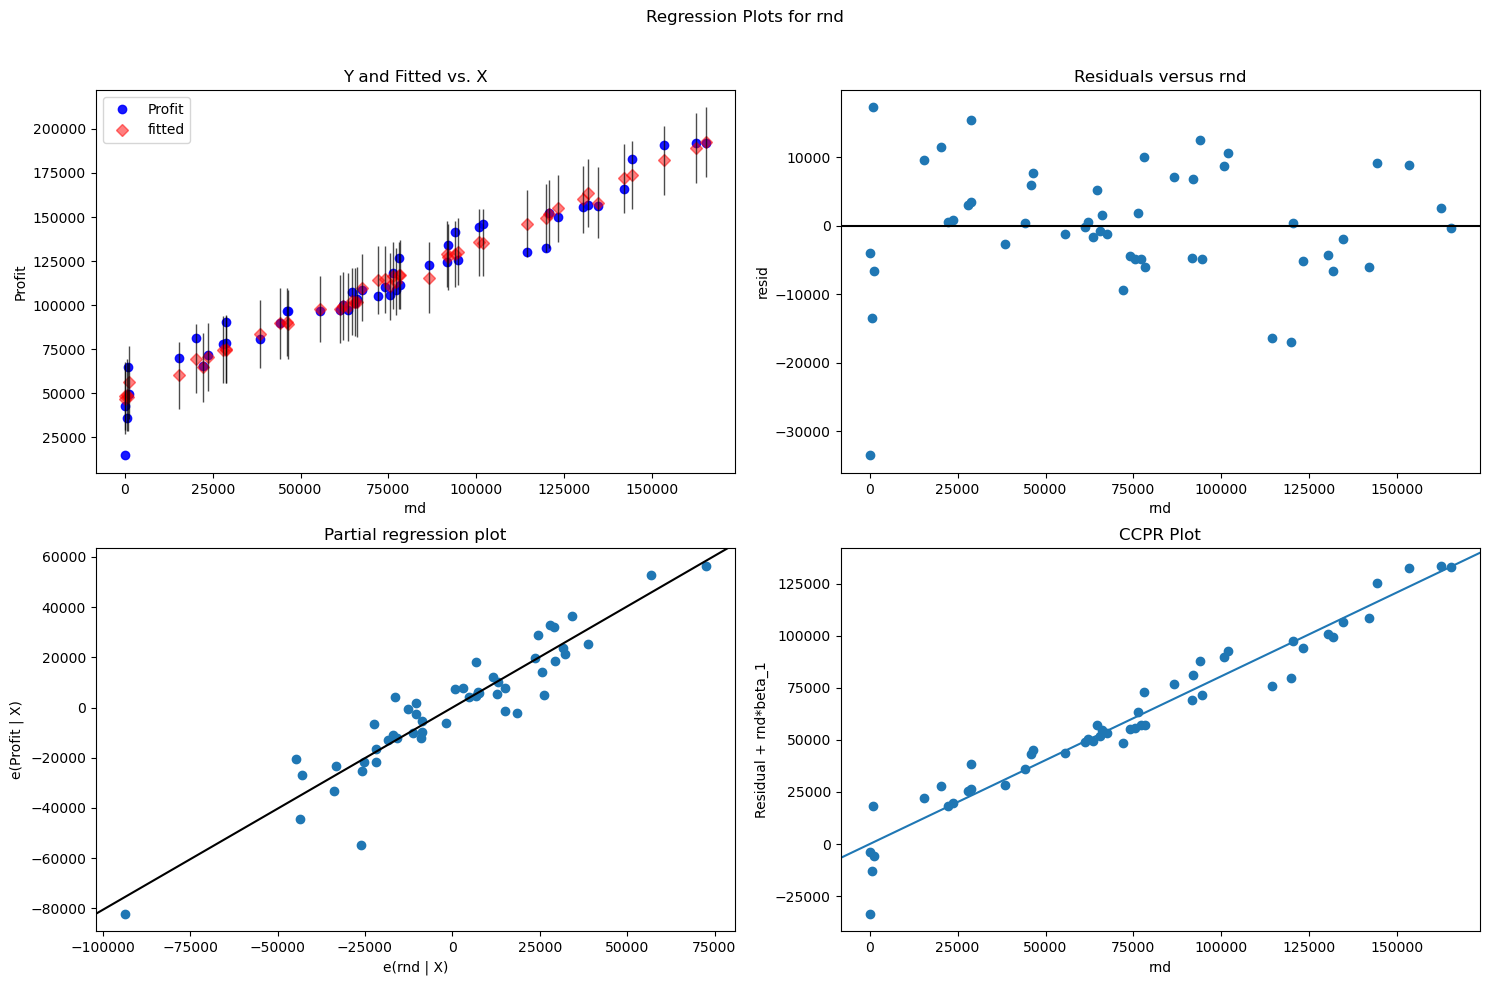

In [37]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "rnd", fig=fig)
plt.show()

eval_env: 1


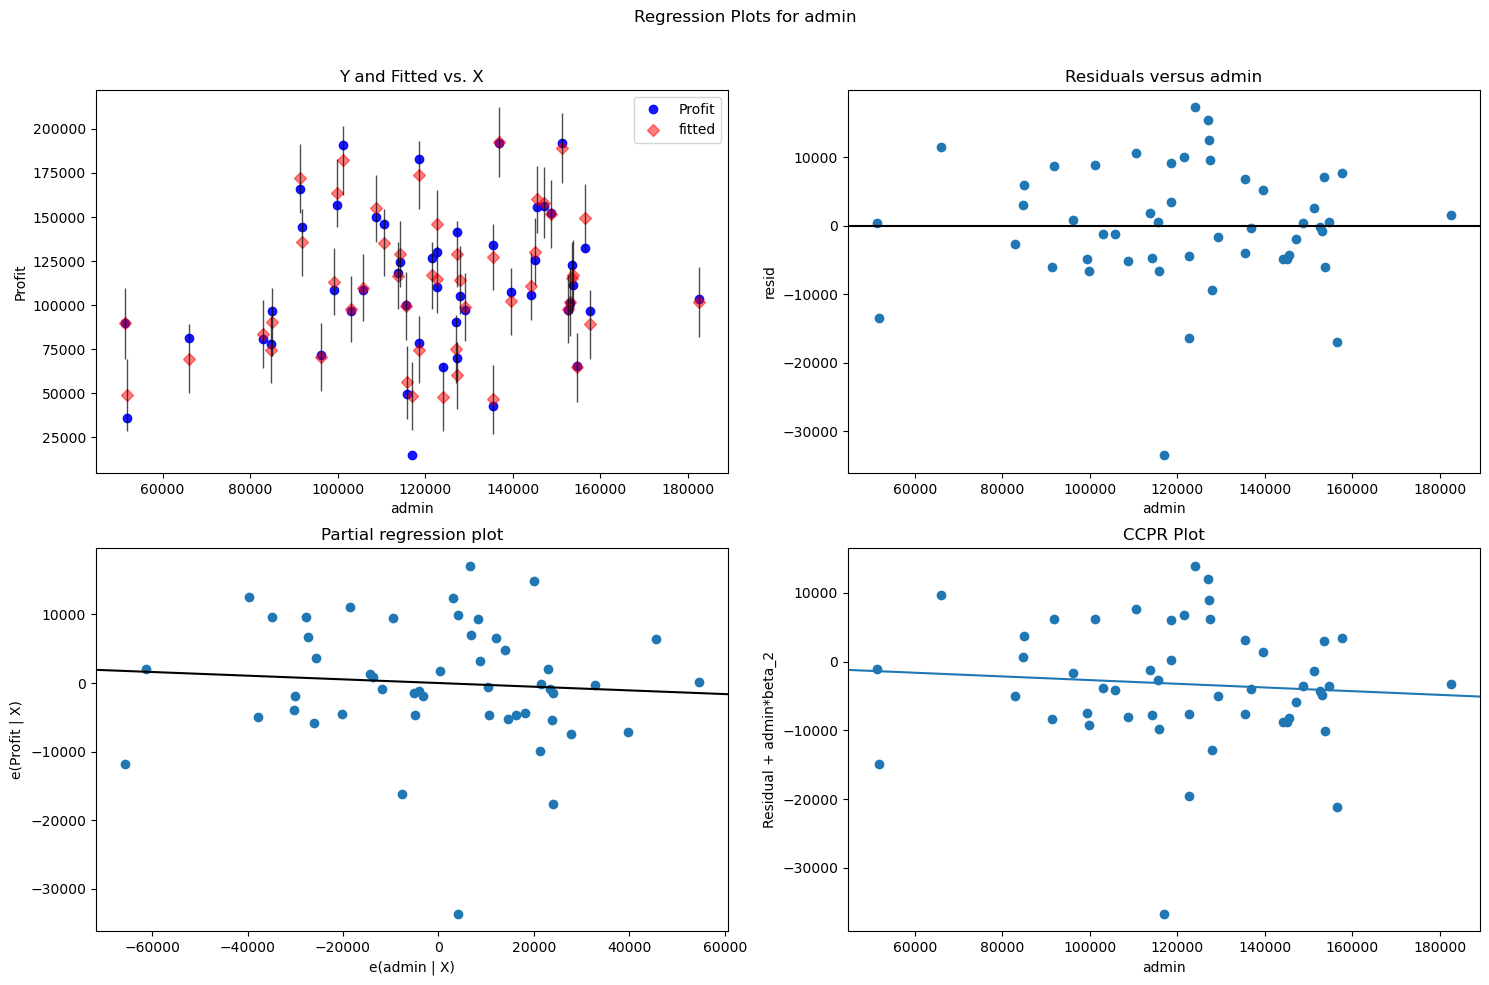

In [38]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "admin", fig=fig)
plt.show()

eval_env: 1


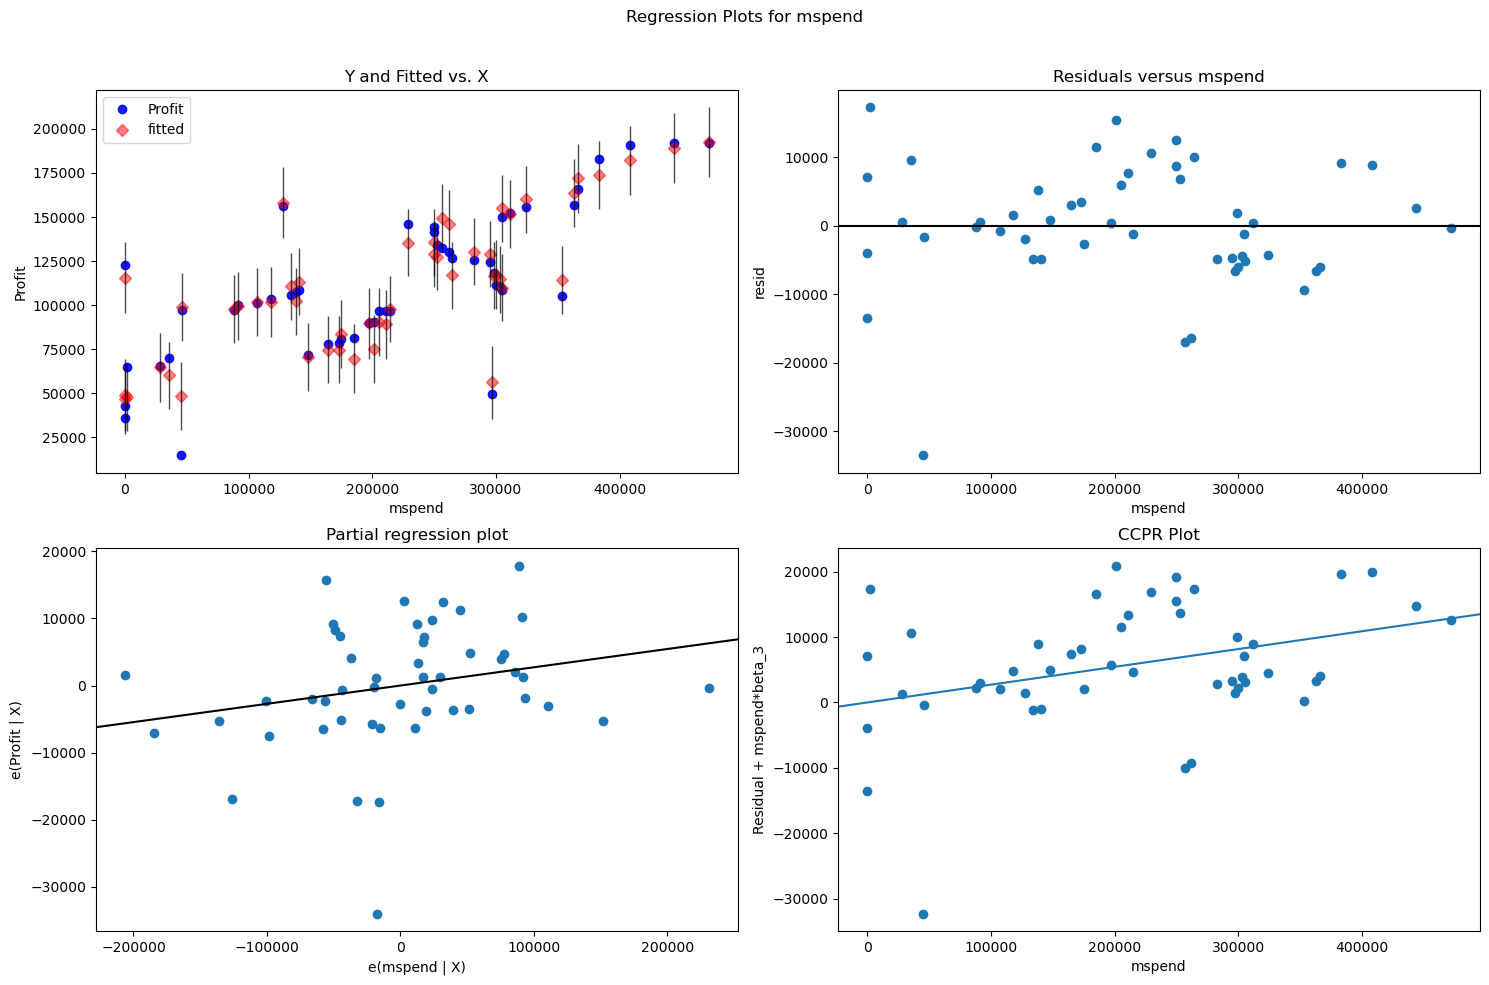

In [39]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "mspend", fig=fig)
plt.show()

In [40]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

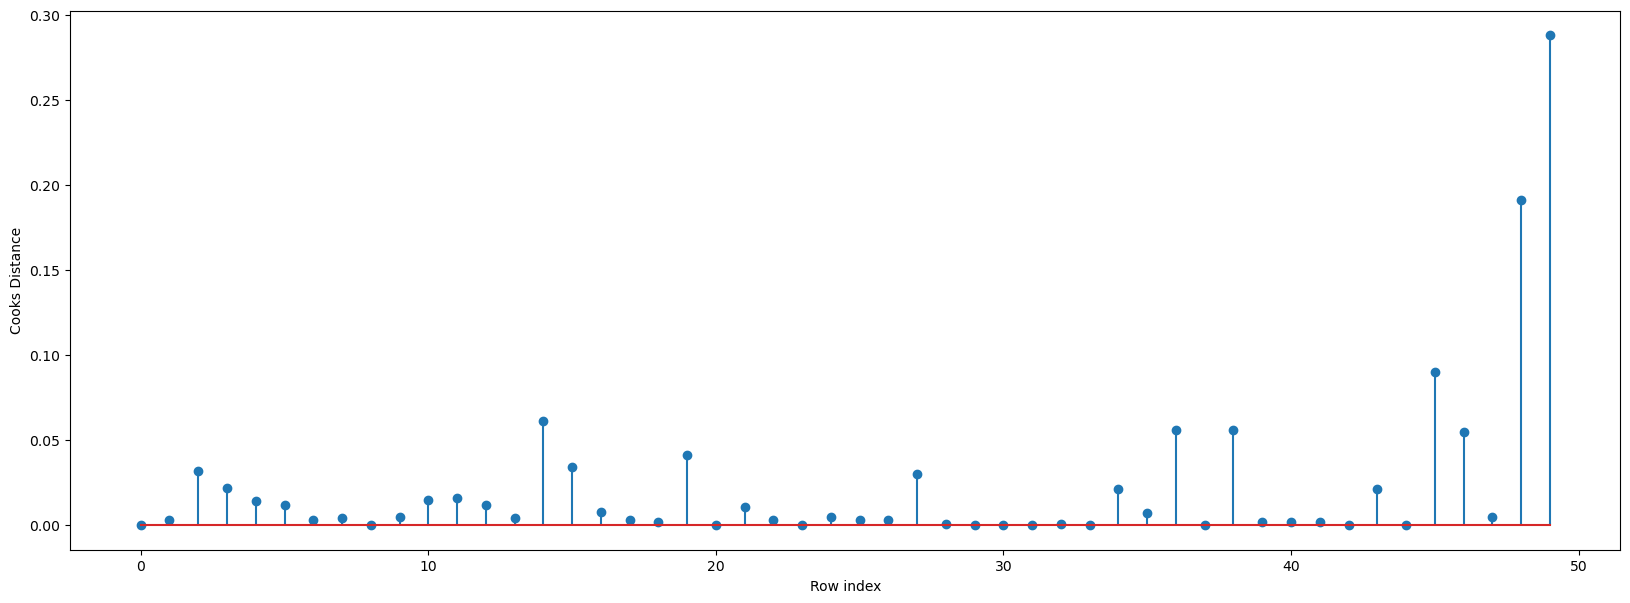

In [41]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
(np.argmax(c),np.max(c))


(49, 0.2880822927543267)

In [43]:
final_model= smf.ols('Profit~rnd+admin',data = df1).fit()


In [44]:
(final_model.rsquared,final_model.aic)


(0.9478129385009173, 1059.6636934567293)

In [45]:
new_data=pd.DataFrame({'rnd':140679,'admin':195785,'mspend':502890},index=[1])


In [47]:
final_model.predict(new_data)

1    165792.804983
dtype: float64

# Toyato

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Multiple%20linear%20regression/ToyotaCorolla.csv",encoding="ISO-8859-1")
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
data.shape

(1436, 38)

In [4]:
data.isnull()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
data.drop(columns=['Id','Model','Fuel_Type'],inplace=True)

In [7]:
data

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,90,1,Blue,0,2000,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,90,1,Silver,0,2000,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,90,1,Blue,0,2000,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,90,0,Black,0,2000,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,90,0,Black,0,2000,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,Blue,0,1300,...,1,1,1,0,1,1,1,0,0,0
1432,10845,72,9,1998,19000,86,0,Grey,0,1300,...,0,0,1,0,0,1,1,0,0,0
1433,8500,71,10,1998,17016,86,0,Blue,0,1300,...,0,0,1,0,0,0,1,0,0,0
1434,7250,70,11,1998,16916,86,1,Grey,0,1300,...,0,0,0,0,0,0,1,0,0,0


In [8]:
data.shape

(1436, 35)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             1436 non-null   int64 
 1   Age_08_04         1436 non-null   int64 
 2   Mfg_Month         1436 non-null   int64 
 3   Mfg_Year          1436 non-null   int64 
 4   KM                1436 non-null   int64 
 5   HP                1436 non-null   int64 
 6   Met_Color         1436 non-null   int64 
 7   Color             1436 non-null   object
 8   Automatic         1436 non-null   int64 
 9   cc                1436 non-null   int64 
 10  Doors             1436 non-null   int64 
 11  Cylinders         1436 non-null   int64 
 12  Gears             1436 non-null   int64 
 13  Quarterly_Tax     1436 non-null   int64 
 14  Weight            1436 non-null   int64 
 15  Mfr_Guarantee     1436 non-null   int64 
 16  BOVAG_Guarantee   1436 non-null   int64 
 17  Guarantee_Peri

In [10]:
data.drop(columns=['Mfg_Month','Mfg_Year','Met_Color','Color','Automatic','Cylinders'],inplace=True)

In [11]:
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,46986,90,2000,3,5,210,1165,0,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,72937,90,2000,3,5,210,1165,0,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,41711,90,2000,3,5,210,1165,1,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,48000,90,2000,3,5,210,1165,1,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,38500,90,2000,3,5,210,1170,1,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,1,...,1,1,1,0,1,1,1,0,0,0
1432,10845,72,19000,86,1300,3,5,69,1015,0,...,0,0,1,0,0,1,1,0,0,0
1433,8500,71,17016,86,1300,3,5,69,1015,0,...,0,0,1,0,0,0,1,0,0,0
1434,7250,70,16916,86,1300,3,5,69,1015,1,...,0,0,0,0,0,0,1,0,0,0


In [12]:
data.drop(columns=['Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Tow_Bar'],inplace=True)

In [13]:
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


(array([[1429.,    7.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1436.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 122.,  331.,  417.,  301.,  140.,   64.,   30.,   17.,   12.,
            2.],
        [1436.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1436.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1436.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1436.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1436.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1436.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.]]),
 array([1.000000e+00, 2.430090e+04, 4.860080e+04, 7.290070e+04,
        9.720060e+04, 1.215005e+05, 1.458004e+05, 1.701003e+05,
        1.944002e+05, 2.187001e+05, 2.430000e+05]),
 <a list of 9 Bar

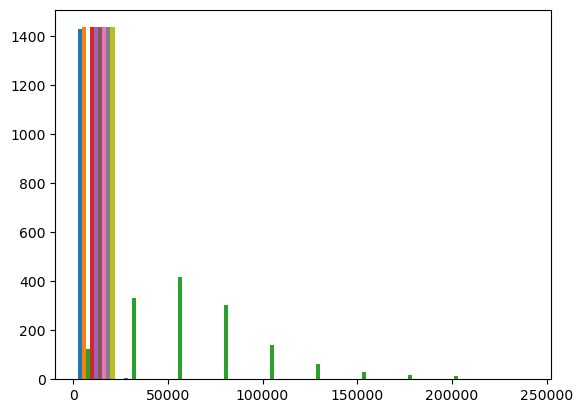

In [14]:
plt.hist(data)

In [15]:
data=data.rename({'Age_08_04':'Age','Quarterly_Tax':'Qtax','Weight':'WT'},axis=1)
data

,Price,Age,KM,HP,cc,Doors,Gears,Qtax,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [16]:
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Qtax+WT',data=data).fit()

In [17]:
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
Qtax            3.949081
WT             16.958632
dtype: float64

In [18]:
print(model.tvalues, '\n', model.pvalues)


Intercept    -3.948666
Age         -46.511852
KM          -16.621622
HP           11.241018
cc           -1.344222
Doors        -0.040410
Gears         3.016007
Qtax          3.014535
WT           15.879803
dtype: float64 
 Intercept     8.241949e-05
Age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
cc            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
Qtax          2.619148e-03
WT            2.048576e-52
dtype: float64


In [19]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [20]:
data.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Qtax,WT
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Qtax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
WT,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


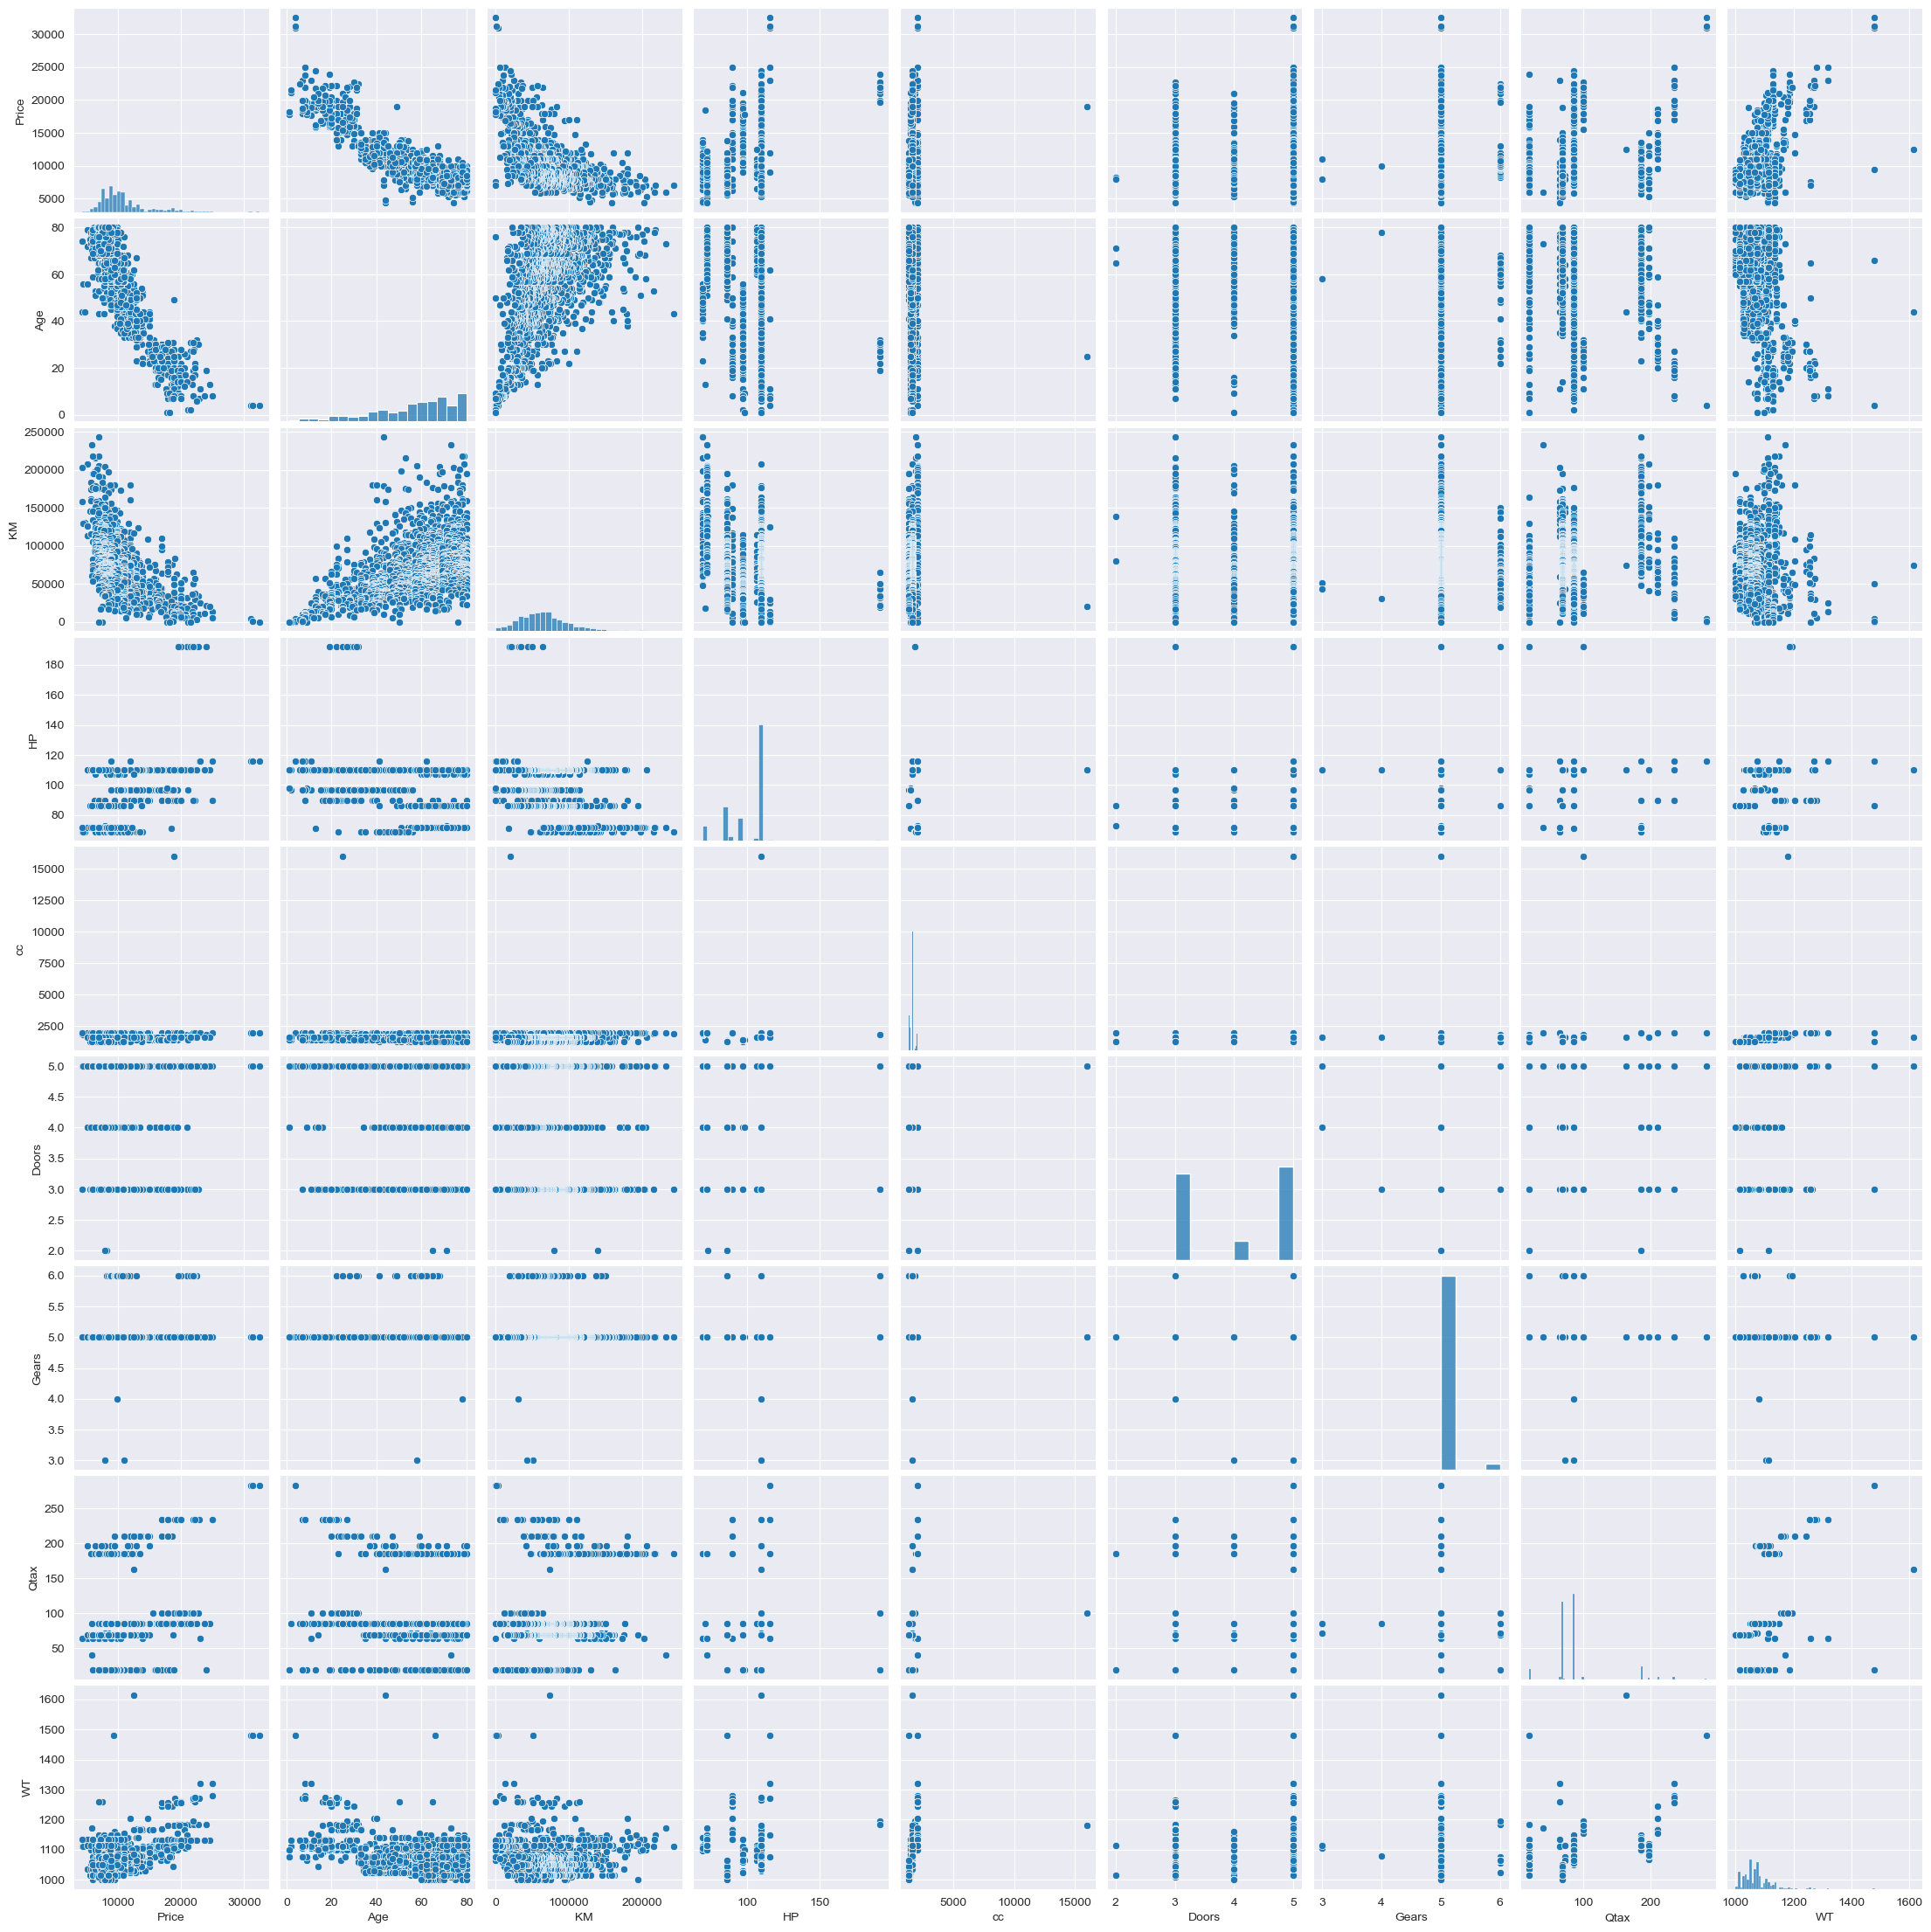

In [21]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [22]:
rsq_age = smf.ols('Age~KM+HP+cc+Doors+Gears+Qtax+WT',data=data).fit().rsquared
vif_age = 1/(1-rsq_age)
rsq_km = smf.ols('KM~Age+HP+cc+Doors+Gears+Qtax+WT',data=data).fit().rsquared
vif_km = 1/(1-rsq_km)
rsq_hp = smf.ols('HP~KM+Age+cc+Doors+Gears+Qtax+WT',data=data).fit().rsquared
vif_hp = 1/(1-rsq_hp)
rsq_cc = smf.ols('cc~KM+HP+Age+Doors+Gears+Qtax+WT',data=data).fit().rsquared
vif_cc = 1/(1-rsq_cc)
rsq_doors = smf.ols('Doors~KM+HP+cc+Age+Gears+Qtax+WT',data=data).fit().rsquared
vif_doors= 1/(1-rsq_doors)
rsq_gears = smf.ols('Gears~KM+HP+cc+Doors+Age+Qtax+WT',data=data).fit().rsquared
vif_gears = 1/(1-rsq_gears)
rsq_qtax = smf.ols('Qtax~KM+HP+cc+Doors+Gears+Age+WT',data=data).fit().rsquared
vif_qtax = 1/(1-rsq_qtax)
rsq_wt = smf.ols('WT~KM+HP+cc+Doors+Gears+Qtax+Age',data=data).fit().rsquared
vif_wt = 1/(1-rsq_wt)


In [25]:
d1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','Qtax','WT'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qtax,vif_wt]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Qtax,2.311431
7,WT,2.516420


In [26]:
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Qtax',data=data).fit()
f'AIC:{model.aic}, rsq_wt:{rsq_wt}'

'AIC:25000.74856959188, rsq_wt:0.6026100314743239'

In [27]:
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+WT',data=data).fit()
f'AIC:{model.aic}, rsq_wt:{rsq_wt}'

'AIC:24776.19238098143, rsq_wt:0.6026100314743239'

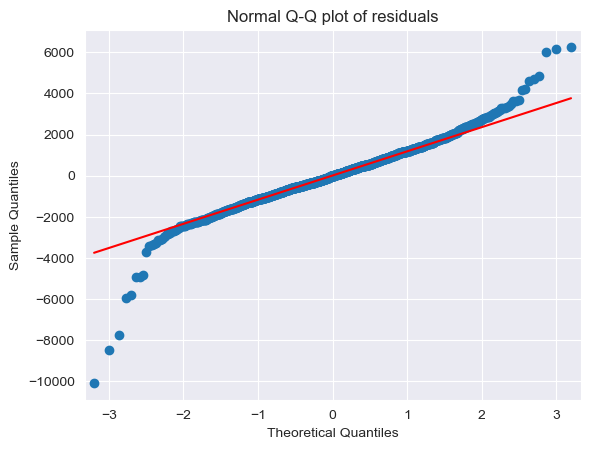

In [28]:
import statsmodels.api as sm
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+WT',data=data).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [29]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

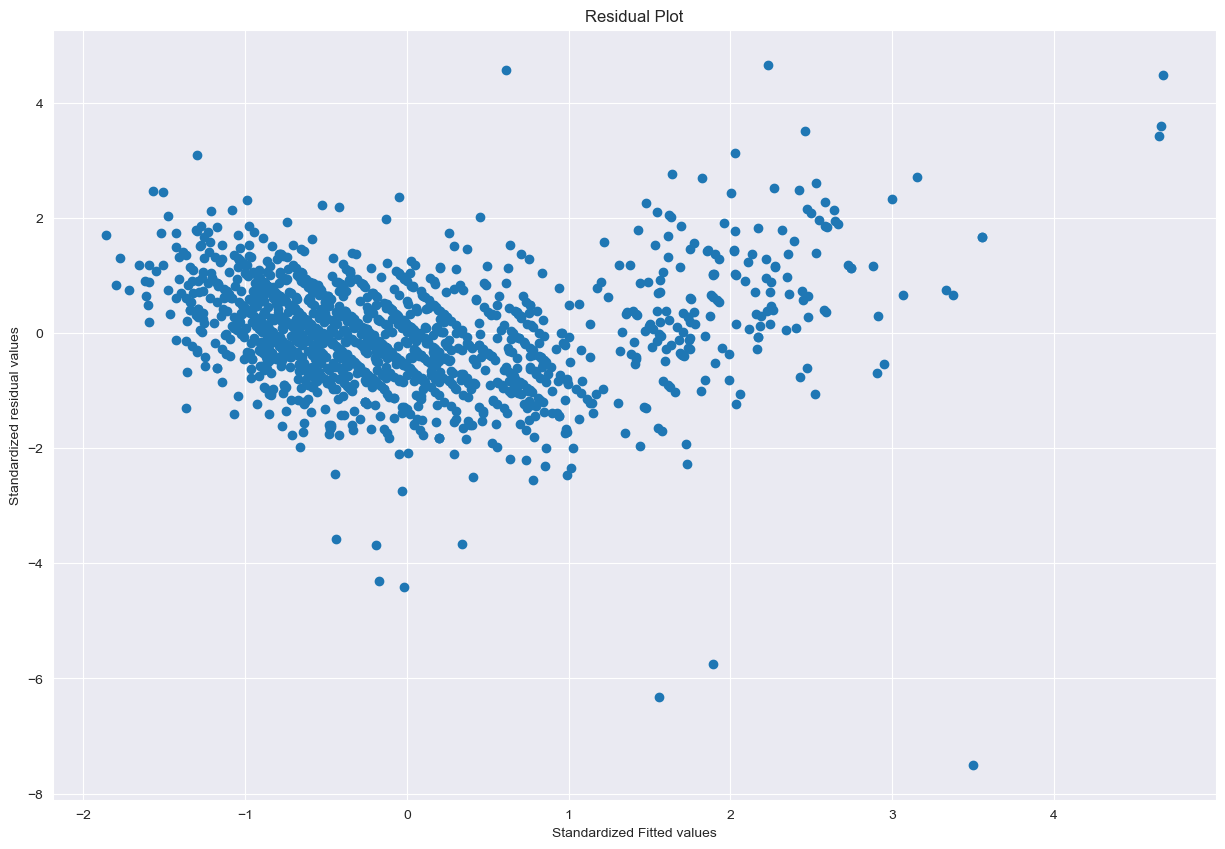

In [30]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


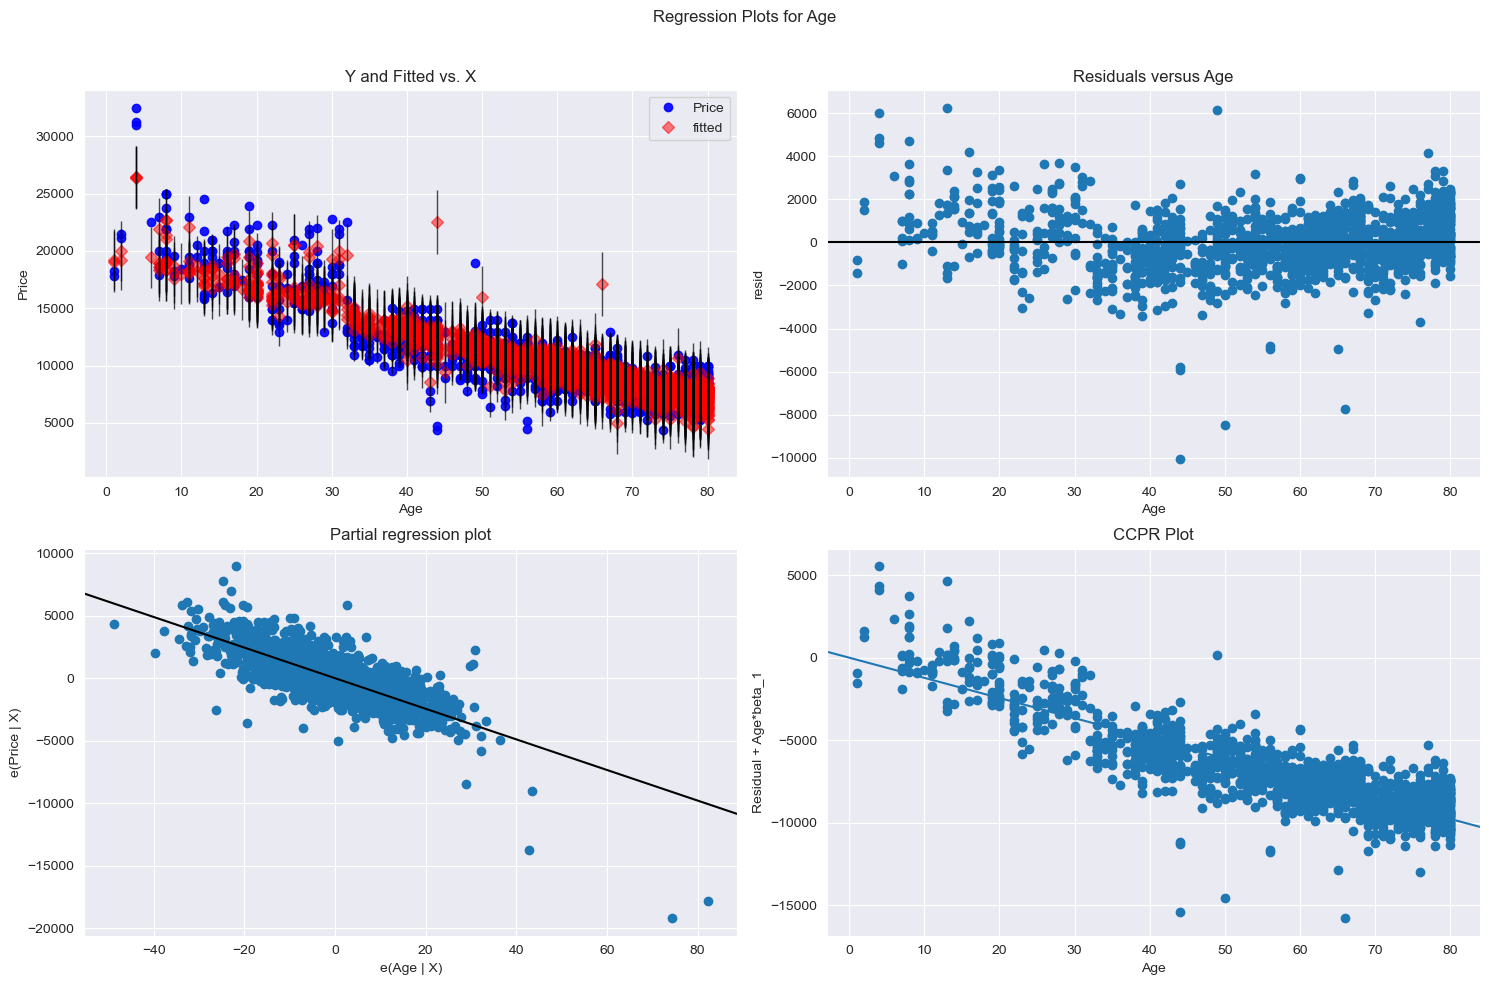

In [31]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

eval_env: 1


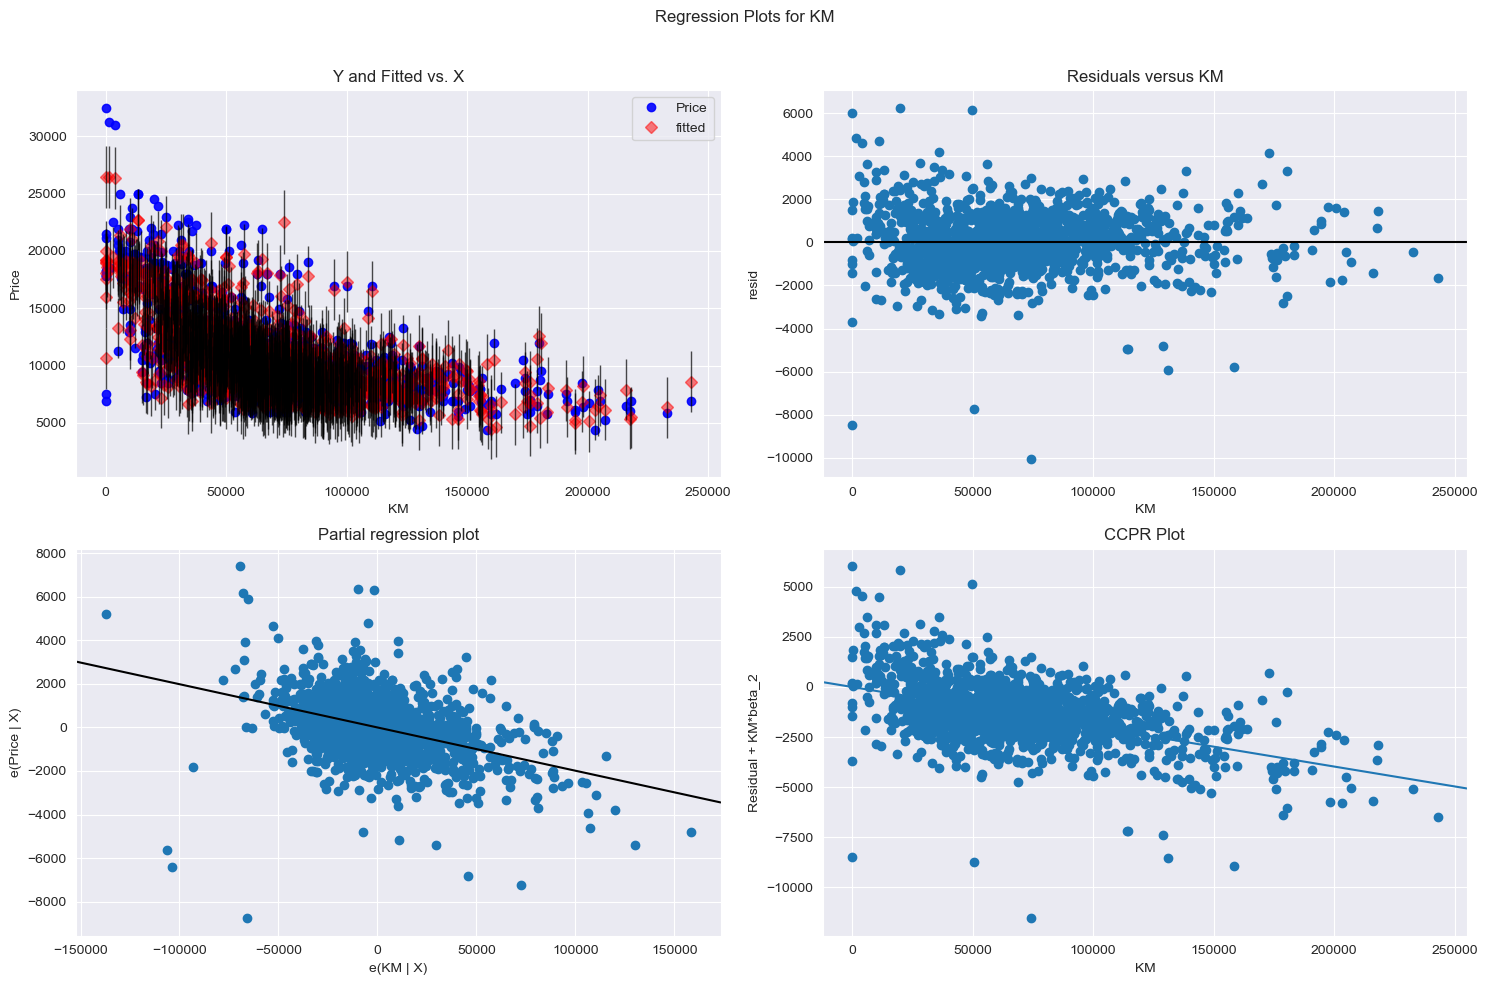

In [33]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


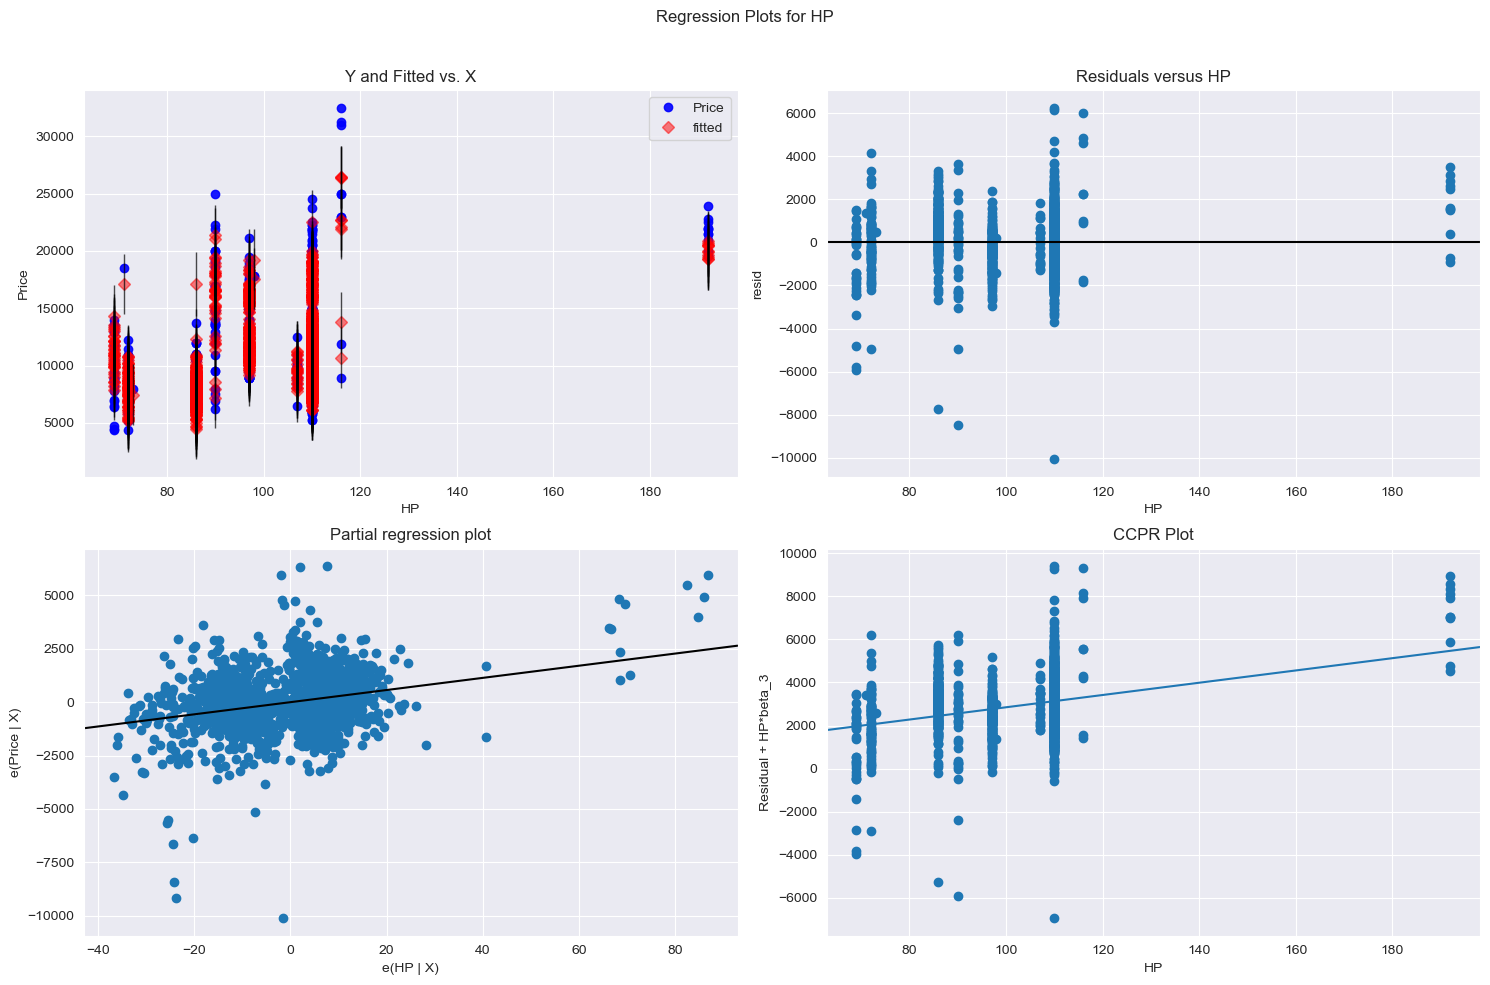

In [34]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


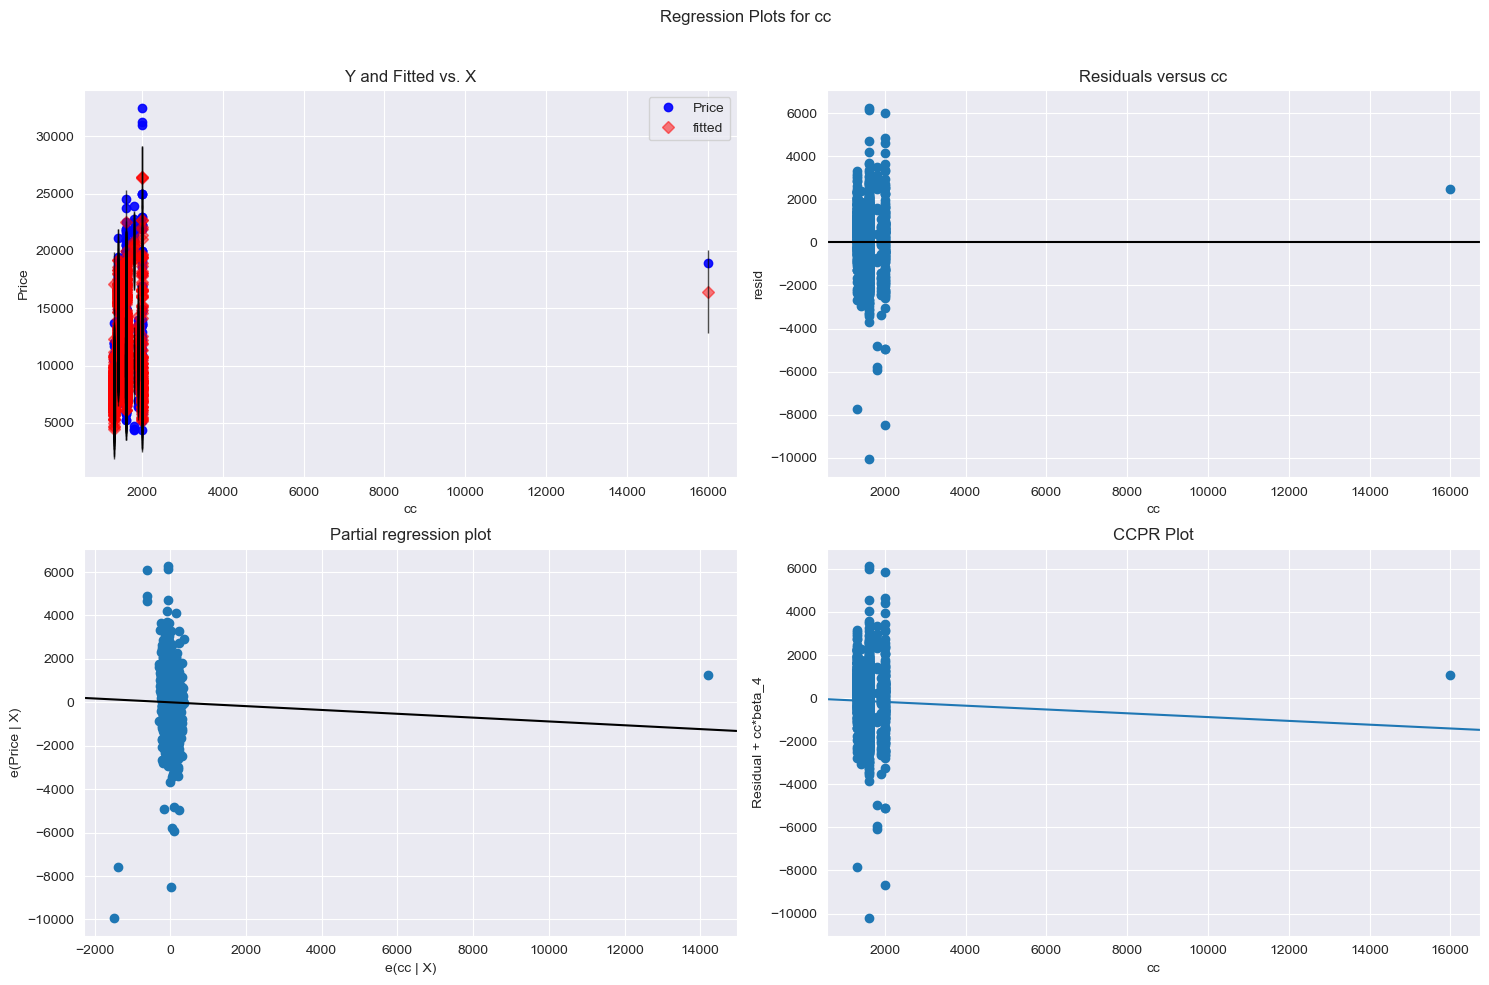

In [35]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


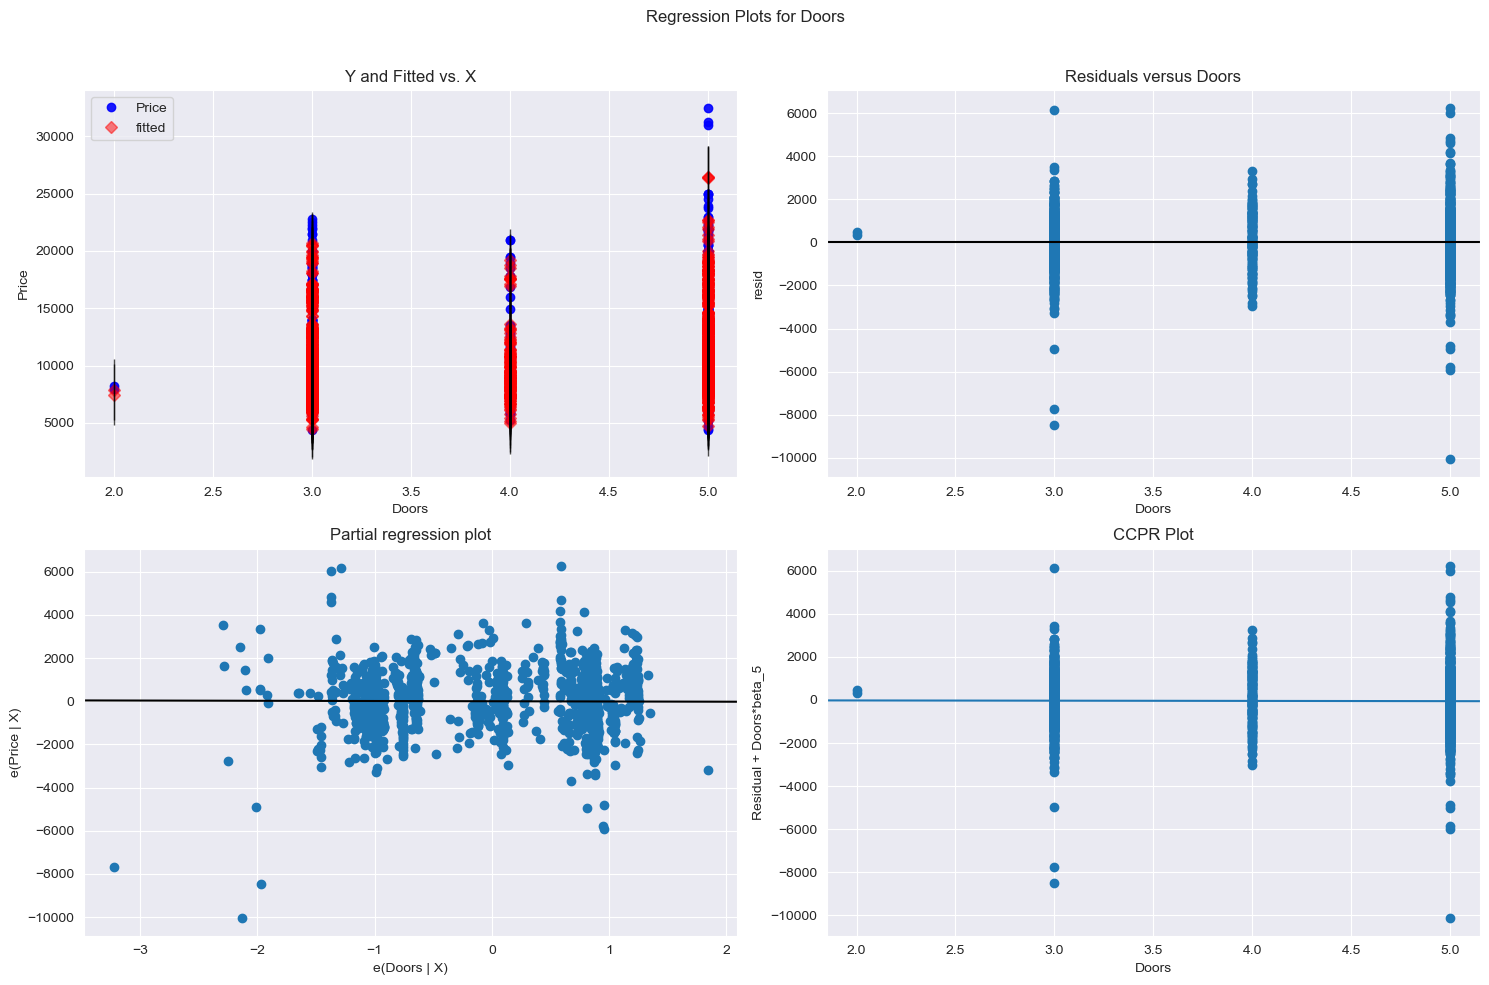

In [36]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


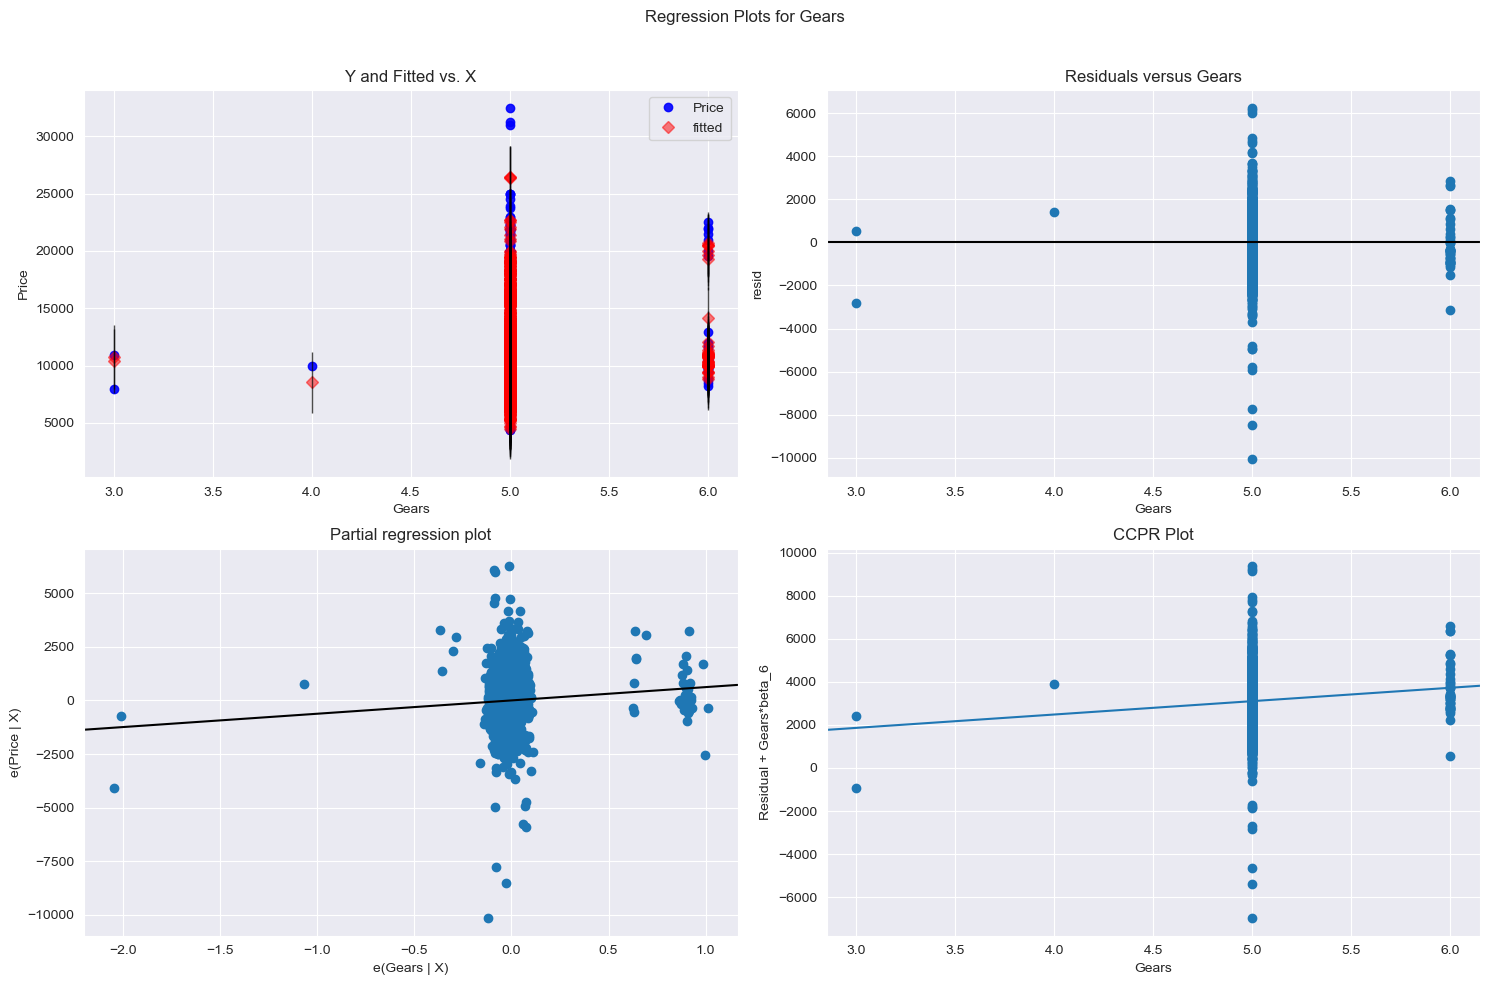

In [37]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


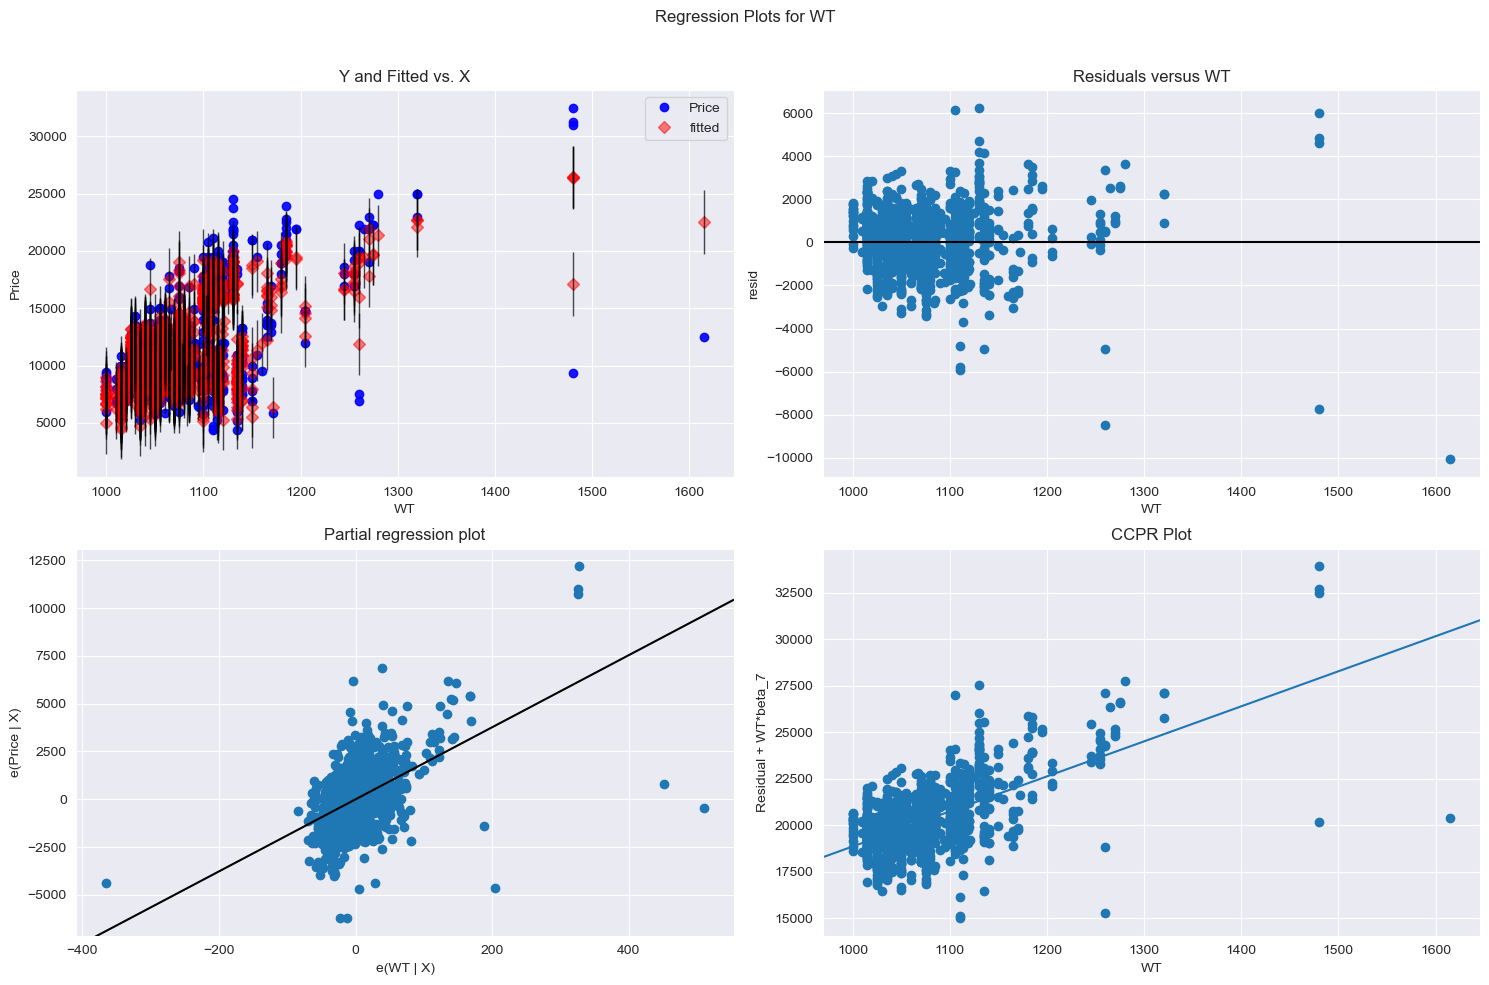

In [39]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)
plt.show()

In [42]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

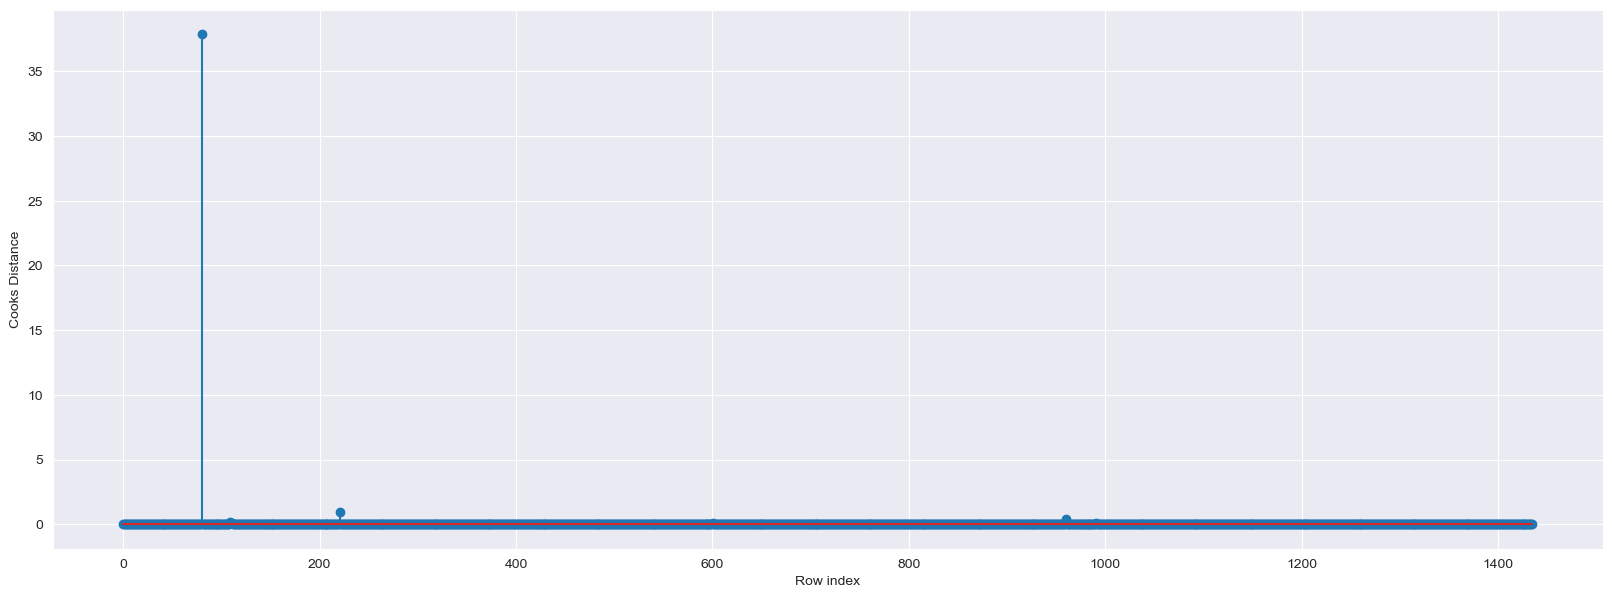

In [44]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [45]:
(np.argmax(c),np.max(c))


(80, 37.87216116118633)

In [46]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

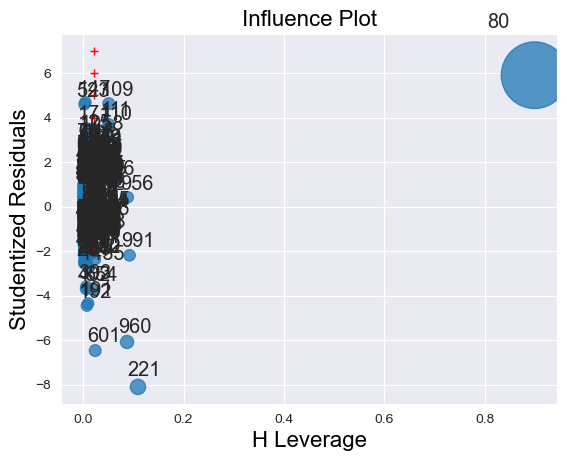

In [47]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
influence_plot(model,alpha=0.5)
y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.show()

In [48]:
data[data.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,Qtax,WT
80,18950,25,20019,110,16000,5,5,100,1180


In [49]:
data=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Multiple%20linear%20regression/ToyotaCorolla.csv",encoding="ISO-8859-1")
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [54]:
data.drop(columns=['Model','Fuel_Type','Color','Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Tow_Bar'],inplace=True)

In [55]:
data

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
0,1,13500,23,10,2002,46986,90,1,0,2000,3,4,5,210,1165
1,2,13750,23,10,2002,72937,90,1,0,2000,3,4,5,210,1165
2,3,13950,24,9,2002,41711,90,1,0,2000,3,4,5,210,1165
3,4,14950,26,7,2002,48000,90,0,0,2000,3,4,5,210,1165
4,5,13750,30,3,2002,38500,90,0,0,2000,3,4,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,7500,69,12,1998,20544,86,1,0,1300,3,4,5,69,1025
1432,1439,10845,72,9,1998,19000,86,0,0,1300,3,4,5,69,1015
1433,1440,8500,71,10,1998,17016,86,0,0,1300,3,4,5,69,1015
1434,1441,7250,70,11,1998,16916,86,1,0,1300,3,4,5,69,1015


In [57]:
data.drop(columns=['Id','Mfg_Month','Mfg_Year','Met_Color','Automatic','Cylinders'],inplace=True)

In [58]:
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [59]:
data=data.rename({'Age_08_04':'Age','Quarterly_Tax':'Qtax','Weight':'WT'},axis=1)
data

,Price,Age,KM,HP,cc,Doors,Gears,Qtax,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [60]:
data1=data.drop(data.index[[80]],axis=0).reset_index()

In [61]:
data1

,index,Price,Age,KM,HP,cc,Doors,Gears,Qtax,WT
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [62]:
data1=data1.drop(['index'],axis=1)
data1

,Price,Age,KM,HP,cc,Doors,Gears,Qtax,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [63]:
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+WT',data=data1).fit()

In [64]:
(model.rsquared,model.aic,model.bic)

(0.8656883979875687, 24725.264231919595, 24767.415592945144)

In [66]:
model1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Qtax',data=data1).fit()

In [67]:
(model1.rsquared,model1.aic,model1.bic)

(0.8394508024403655, 24981.322667036107, 25023.474028061657)

In [68]:
model_influence= model.get_influence()
(c, _) = model_influence.cooks_distance

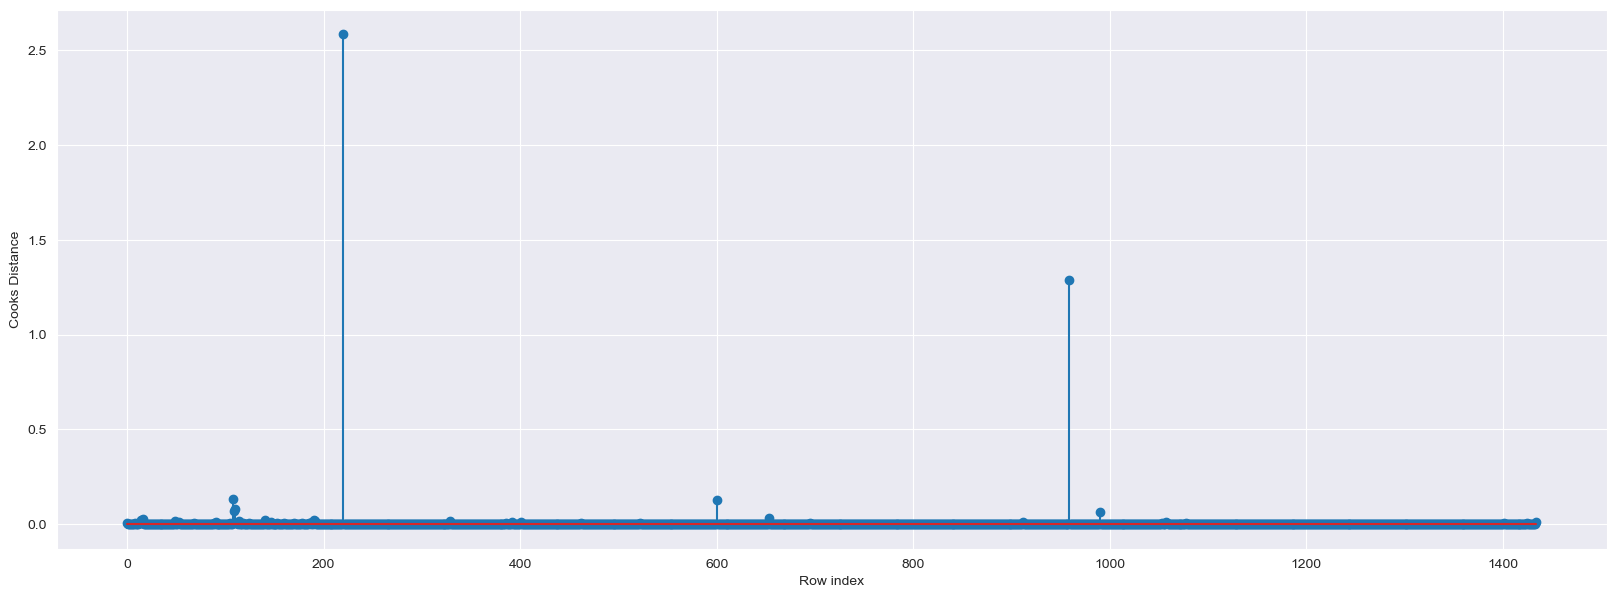

In [74]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [75]:
(np.argmax(c),np.max(c))

(220, 2.5854311861898127)

In [76]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

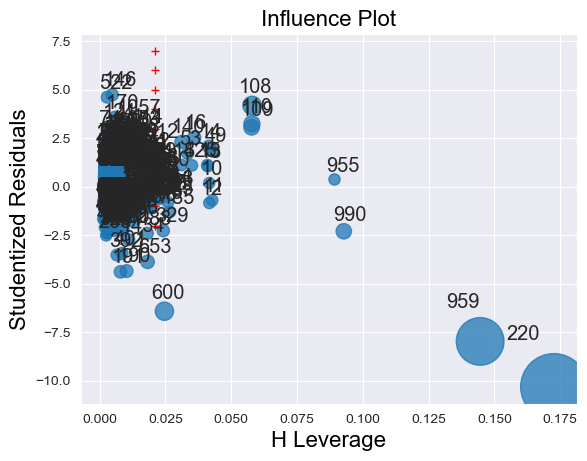

In [77]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
influence_plot(model,alpha=0.5)
y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.show()

In [78]:
data2=data1.drop(data.index[[220,959]],axis=0)

In [79]:
data2

,Price,Age,KM,HP,cc,Doors,Gears,Qtax,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [81]:
data2=data2.reset_index()
data2

,level_0,index,Price,Age,KM,HP,cc,Doors,Gears,Qtax,WT
0,0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1428,1428,1430,7500,69,20544,86,1300,3,5,69,1025
1429,1429,1431,10845,72,19000,86,1300,3,5,69,1015
1430,1430,1432,8500,71,17016,86,1300,3,5,69,1015
1431,1431,1433,7250,70,16916,86,1300,3,5,69,1015


In [83]:
data2.drop(columns=['level_0','index'],inplace=True)

In [84]:
data2

,Price,Age,KM,HP,cc,Doors,Gears,Qtax,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [86]:
model2= smf.ols('Price~Age+KM+HP+cc+Doors+Gears+WT',data = data2).fit()

In [87]:
(model2.rsquared,model2.aic,model2.bic)

(0.8840192903897235, 24482.18589185263, 24524.326095275257)

In [88]:
model3= smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Qtax',data = data2).fit()

In [90]:
(model3.rsquared,model3.aic,model3.bic)

(0.8397124658726294, 24945.826464216774, 24987.9666676394)

In [91]:
model_influence= model2.get_influence()
(c, _) = model_influence.cooks_distance

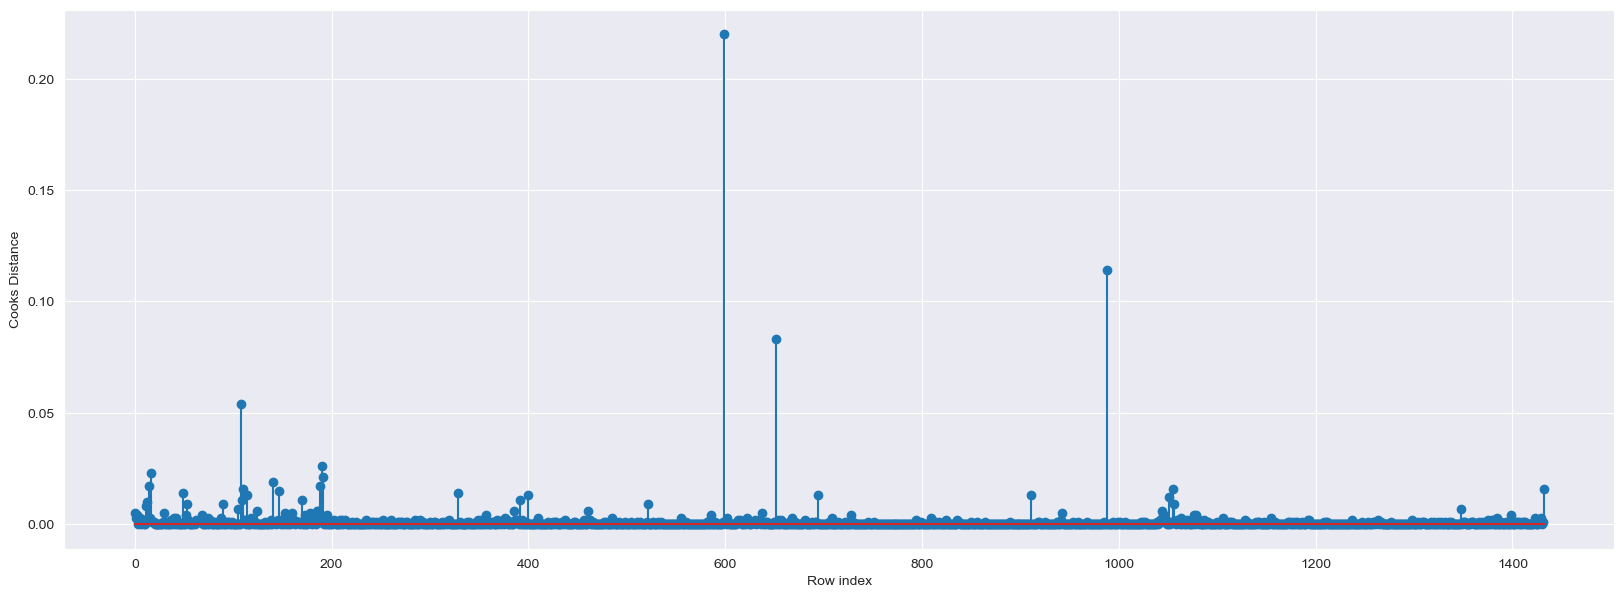

In [92]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [93]:
(np.argmax(c),np.max(c))


(599, 0.21998042709646165)

In [94]:
final_model= smf.ols('Price~Age+KM+HP+cc+Doors+Gears+WT',data = data2).fit()

In [96]:
(final_model.rsquared,final_model.aic)

(0.8840192903897235, 24482.18589185263)

In [97]:
new_data=pd.DataFrame({'Age':27,'KM':22678,'HP':100,'cc':2000,'Doors':3,'Gears':5,'WT':1450},index=[1])

In [98]:
final_model.predict(new_data)

1    25670.247541
dtype: float64

In [99]:
final_model.predict(data2.iloc[0:5,])


0    16118.058407
1    15688.778596
2    16092.982559
3    15764.281185
4    15634.939211
dtype: float64

In [100]:
final_model.predict(data2)

0       16118.058407
1       15688.778596
2       16092.982559
3       15764.281185
4       15634.939211
            ...     
1428     9069.329722
1429     8432.171004
1430     8577.324773
1431     8691.313533
1432    11002.102116
Length: 1433, dtype: float64